In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

Logistic Regression - Classification model using def function to reduce the outliers between the range and building a prediction model with test_train_split using SciKit Learn library

In [2]:
data=pd.read_csv('seattleWeather_1948-2017 (1).csv')

In [3]:
data.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [4]:
data.tail()

,DATE,PRCP,TMAX,TMIN,RAIN
25546,2017-12-10,0.0,49,34,False
25547,2017-12-11,0.0,49,29,False
25548,2017-12-12,0.0,46,32,False
25549,2017-12-13,0.0,48,34,False
25550,2017-12-14,0.0,50,36,False


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25548 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25548 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [6]:
data.shape

(25551, 5)

In [7]:
data.describe()

,PRCP,TMAX,TMIN
count,25548.000000,25551.000000,25551.000000
mean,0.106222,59.544206,44.514226
std,0.239031,12.772984,8.892836
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


In [8]:
##missing values check exact cells
data[pd.isna(data.PRCP)]
data[pd.isna(data.RAIN)]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [9]:
##count of values missing
data.isna().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [10]:
## % of values missing
percent_missing=(data.isna().sum()/data.shape[0])*100
percent_missing

DATE    0.000000
PRCP    0.011741
TMAX    0.000000
TMIN    0.000000
RAIN    0.011741
dtype: float64

missing value %
1. <30% - drop the rows with the missing values
2. 30%<NA<70% - impute the missing values
3. NA>70% - drop the variables

In [11]:
##frequency count of each category
data.RAIN.value_counts()

RAIN
False    14648
True     10900
Name: count, dtype: int64

In [12]:
data.dropna(inplace=True)

In [13]:
data.isna().sum()

DATE    0
PRCP    0
TMAX    0
TMIN    0
RAIN    0
dtype: int64

In [14]:
data['DATE']=pd.to_datetime(data.DATE)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25548 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    25548 non-null  datetime64[ns]
 1   PRCP    25548 non-null  float64       
 2   TMAX    25548 non-null  int64         
 3   TMIN    25548 non-null  int64         
 4   RAIN    25548 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 1.2+ MB


In [16]:
from sklearn.preprocessing import LabelEncoder
data['RAIN']=LabelEncoder().fit_transform(data['RAIN'])

In [17]:
import warnings
warnings.filterwarnings('ignore')

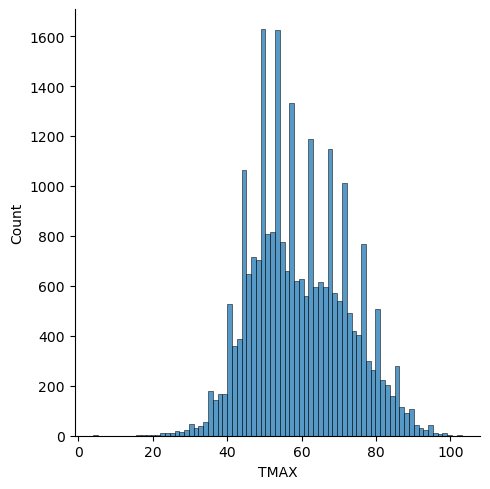

In [18]:
sns.displot(data['TMAX'])

<Axes: xlabel='TMAX', ylabel='Count'>

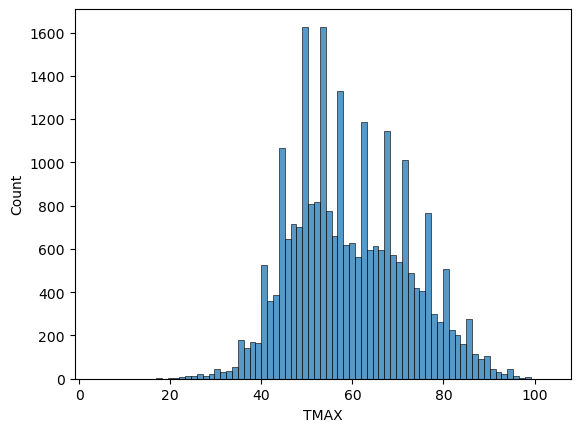

In [19]:
sns.histplot(data.TMAX)

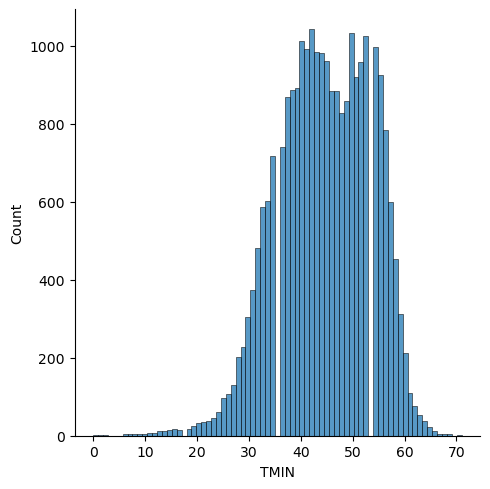

In [20]:
sns.displot(data.TMIN)

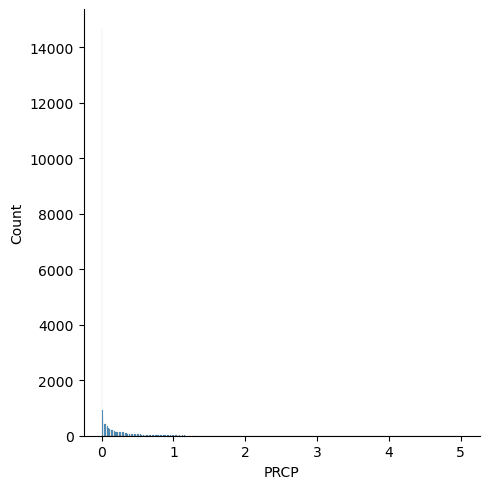

In [21]:
sns.displot(data.PRCP)

In [22]:
data.describe()

,DATE,PRCP,TMAX,TMIN,RAIN
count,25548,25548.000000,25548.000000,25548.000000,25548.000000
mean,1982-12-22 05:36:46.669798016,0.106222,59.543056,44.513387,0.426648
min,1948-01-01 00:00:00,0.000000,4.000000,0.000000,0.000000
25%,1965-06-26 18:00:00,0.000000,50.000000,38.000000,0.000000
50%,1982-12-21 12:00:00,0.000000,58.000000,45.000000,0.000000
75%,2000-06-18 06:00:00,0.100000,69.000000,52.000000,1.000000
max,2017-12-14 00:00:00,5.020000,103.000000,71.000000,1.000000
std,NaN,0.239031,12.773265,8.893019,0.494600


In [23]:
##Compare the mean and the max values in the data, we will see that the data has outlier values, which will disrupt the classification model.


In [24]:
def outliers(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers= df[((df<(q1-1.5*IQR))|(df>(q3+1.5*IQR)))]
    return outliers


In [25]:
out_prcp=outliers(data.PRCP)

In [26]:
print('Count of outliers PRCP:'+str(len(out_prcp)))

Count of outliers PRCP:3558


In [27]:
out_tmax=outliers(data['TMAX'])

In [28]:
print('Count of outliers in TMAX:'+str(len(out_tmax)))

Count of outliers in TMAX:24


In [29]:
out_tmin=outliers(data['TMIN'])

In [30]:
print('Count of outliers in TMIN:'+str(len(out_tmin)))

Count of outliers in TMIN:92


In [31]:
#def non_outliers(df):
    #q1=df.quantile(0.25)
    #q3=df.quantile(0.75)
    #IQR=q3-q1
    #non_outliers=df[~((df<(q1-1.5*IQR))|(df>(q3+1.5*IQR)))]
    #outliers_cleaned=outliers.dropna().reset_index()
    #return outliers_cleaned

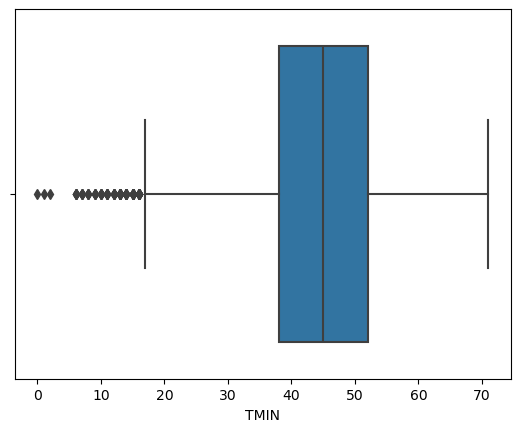

In [32]:
#detecting outliers:
sns.boxplot(x=data['TMIN'])
plt.show()

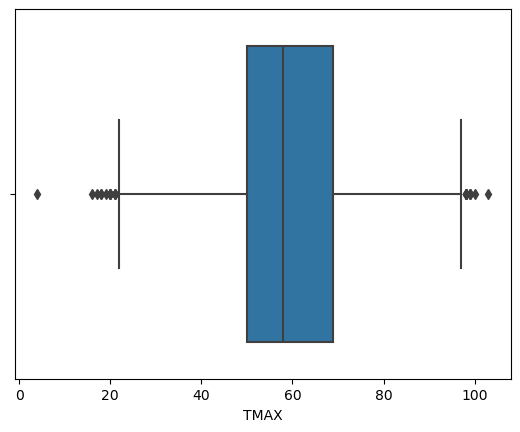

In [33]:
sns.boxplot(x=data['TMAX'])
plt.show()

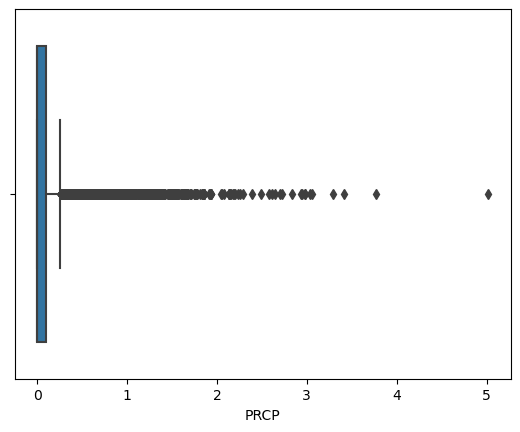

In [34]:
sns.boxplot(x=data['PRCP'])
plt.show()

In [35]:
data.drop(data[data['TMIN']<17].index,inplace=True)

In [36]:
data.drop(data[(data['TMAX']<21.5)|(data['TMAX']>97.5)].index,inplace=True)

In [37]:
#removing outliers from PRCP:
data.drop(data[(data['PRCP']>0.2)|(data['PRCP']<-0.01)].index,inplace=True)

<Axes: xlabel='PRCP'>

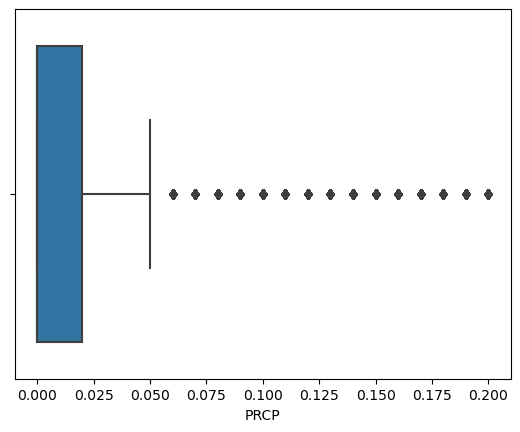

In [38]:
sns.boxplot(x=data.PRCP)

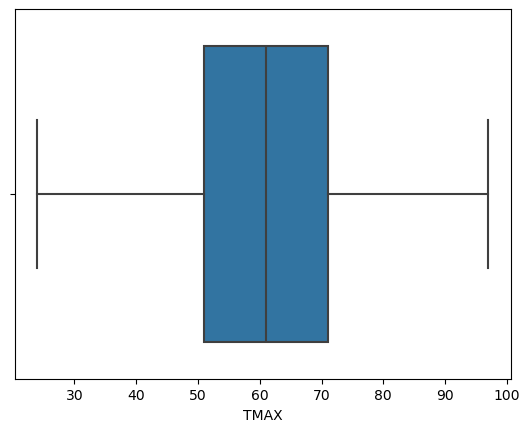

In [39]:
sns.boxplot(x=data.TMAX)
plt.show()

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21207 entries, 4 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    21207 non-null  datetime64[ns]
 1   PRCP    21207 non-null  float64       
 2   TMAX    21207 non-null  int64         
 3   TMIN    21207 non-null  int64         
 4   RAIN    21207 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2)
memory usage: 911.2 KB


In [42]:
##splitting the data in x and y
x=data[['PRCP','TMAX','TMIN']]
y=data['RAIN']

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [44]:
from sklearn.linear_model import LogisticRegression
logM=LogisticRegression()

In [45]:
logM.fit(x_train,y_train)

LogisticRegression()

In [46]:
y_pred=logM.predict(x_test)

In [48]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,y_test)

In [49]:
accuracy

0.9113625648279113